# 3. Online retail data
Online retail 데이터는 영국에 있는 온라인 소매점의 2010 년 1 월 12 일부터 2011 년 9 월 12 일 사이에 발생한 모든 주문 내역

In [1]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
oln = pd.read_excel('/content/drive/MyDrive/Data/2. 실습자료/Ch 03_파이썬 실습 Commerce/Online Retail.xlsx')

In [3]:
oln.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# Columns Info
* InvoiceNo: 주문번호
* StockCode: 상품코드
* Description: 상품 설명
* Quantity: 수량
* InvoceDate: 주문날짜
* UnitPrice: 개별 가격
* CustomerID: 고객번호
* Country: 국가


* 범주형 변수: *빈도frequency 계산 가능*
               invoiceno, stockcode, description, customerid, country
* 연속형 변수: *평균, 표준편차, min/max 등 수치 계산 가능*
               quantity, invoicedate(시간변수), unitprice

In [4]:
oln.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
oln.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
oln.describe(include=np.object)

<ipython-input-6-113e212d0d0b>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  oln.describe(include=np.object)


,InvoiceNo,StockCode,Description,Country
count,541909,541909,540455,541909
unique,25900,4070,4223,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,1114,2313,2369,495478


In [7]:
print("Total number of data : ", oln.shape[0]*oln.shape[1])
print("Total number of missing value : {} = Of the entire data {:.2f}% ".format(oln.isnull().sum().sum(), (oln.isnull().sum().sum()*100)/(oln.shape[0]*oln.shape[1])))
print("Total number of countries : ", oln.Country.nunique())
print("Total number of items sold : ", oln.Description.nunique())

Total number of data :  4335272
Total number of missing value : 136534 = Of the entire data 3.15% 
Total number of countries :  38
Total number of items sold :  4223


* 어떤 고객이 가장 지출을 많이 했을까?
* 상품 금액의 분포는?
* 어떤 물건의 주문량이 높을까?
* 날짜에 따라 판매 금액을 확인해보자
* 요일에 따라서 주문량이 다를까?
* 국가 별 평균 구매 금액은?
* 이 쇼핑몰 판매 물품의 주요 키워드는?

In [8]:
oln.columns = oln.columns.str.lower()
oln.columns

Index(['invoiceno', 'stockcode', 'description', 'quantity', 'invoicedate',
       'unitprice', 'customerid', 'country'],
      dtype='object')

In [9]:
oln.isnull().sum(axis=0)

invoiceno           0
stockcode           0
description      1454
quantity            0
invoicedate         0
unitprice           0
customerid     135080
country             0
dtype: int64

In [10]:
oln[oln.isnull().any(axis=1)].head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom


In [11]:
oln1 = oln.dropna()
oln1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   invoiceno    406829 non-null  object        
 1   stockcode    406829 non-null  object        
 2   description  406829 non-null  object        
 3   quantity     406829 non-null  int64         
 4   invoicedate  406829 non-null  datetime64[ns]
 5   unitprice    406829 non-null  float64       
 6   customerid   406829 non-null  float64       
 7   country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [12]:
oln1['customerid'] = oln1['customerid'].astype('int64')
oln1.head()

<ipython-input-12-dfe1edaadb0b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oln1['customerid'] = oln1['customerid'].astype('int64')


,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [13]:
print(min(oln1['quantity']), max(oln1['quantity']))

-80995 80995


In [14]:
oln1 = oln1[oln1.quantity > 0]

In [15]:
oln1['spent'] = oln1['quantity'] * oln1['unitprice']
oln1.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,spent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [16]:
oln1['year'] = oln1['invoicedate'].dt.year        # 연(숫자)
oln1['month'] = oln1['invoicedate'].dt.month      # 월(숫자)
oln1['day'] = oln1['invoicedate'].dt.day          # 일(숫자)
oln1['weekday'] = oln1['invoicedate'].dt.weekday  # 요일숫자
oln1['hour'] = oln1['invoicedate'].dt.hour        # 시(숫자)
oln1.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,spent,year,month,day,weekday,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,12,1,2,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,2,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,12,1,2,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,2,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,2,8


In [17]:
#주문 순위 top 10 상품
oln1.description.value_counts().head(10)

WHITE HANGING HEART T-LIGHT HOLDER    2028
REGENCY CAKESTAND 3 TIER              1724
JUMBO BAG RED RETROSPOT               1618
ASSORTED COLOUR BIRD ORNAMENT         1408
PARTY BUNTING                         1397
LUNCH BAG RED RETROSPOT               1316
SET OF 3 CAKE TINS PANTRY DESIGN      1159
LUNCH BAG  BLACK SKULL.               1105
POSTAGE                               1099
PACK OF 72 RETROSPOT CAKE CASES       1068
Name: description, dtype: int64

<Axes: >

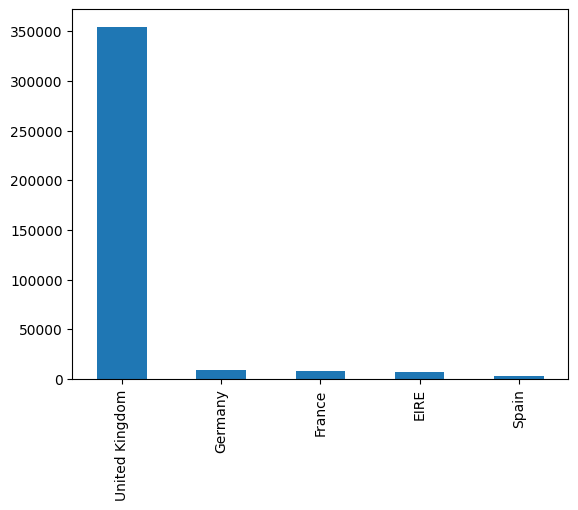

In [18]:
#주문량 많은 top 5 나라
oln1.country.value_counts().head(5).plot.bar()

In [19]:
res1 = oln1[['customerid','spent']].groupby(['customerid']).sum()
res1.sort_values('spent', ascending=False)

res1 = res1[(res1['spent'] > 0)] #구매 금액이 0 이상인 고객만 산출하기

print('Customer number {} was the most consumed {:.2f}'.format(int(res1['spent'].argmax()),res1['spent'].max()))
print('Customer number {} consumed the least {:.2f}'.format(int(res1['spent'].argmin()),res1['spent'].min()))

Customer number 1689 was the most consumed 280206.02
Customer number 3217 consumed the least 3.75


<Axes: >

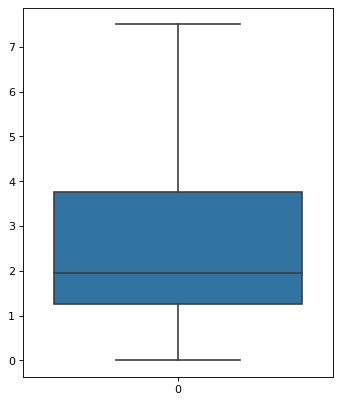

In [20]:
f, ax = plt.subplots(1, 1, figsize=(5, 6), dpi = 80)

#box plot
#최댓값, 최솟값, 중앙값을 사용하여 자료의 측정값들이 어떤 모양으로 분포되어 있는지 등을 쉽게 알 수 있음
sns.boxplot(oln1['unitprice'], showfliers = False, ax=ax)

#대체로 2 파운드 근처에서 상품 가격대가 형성되어 있음

In [21]:
chk1 = oln1[oln1['unitprice']<=8].shape[0]/oln1['unitprice'].shape[0]*100
print("Orders of goods under £8 account for {:.2f} %.".format(chk1))

Orders of goods under £8 account for 93.28 %.


날짜에 따른 판매 금액 - 시계열

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54032 (\N{HANGUL SYLLABLE PAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50529 (\N{HANGUL SYLLABLE AEG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/

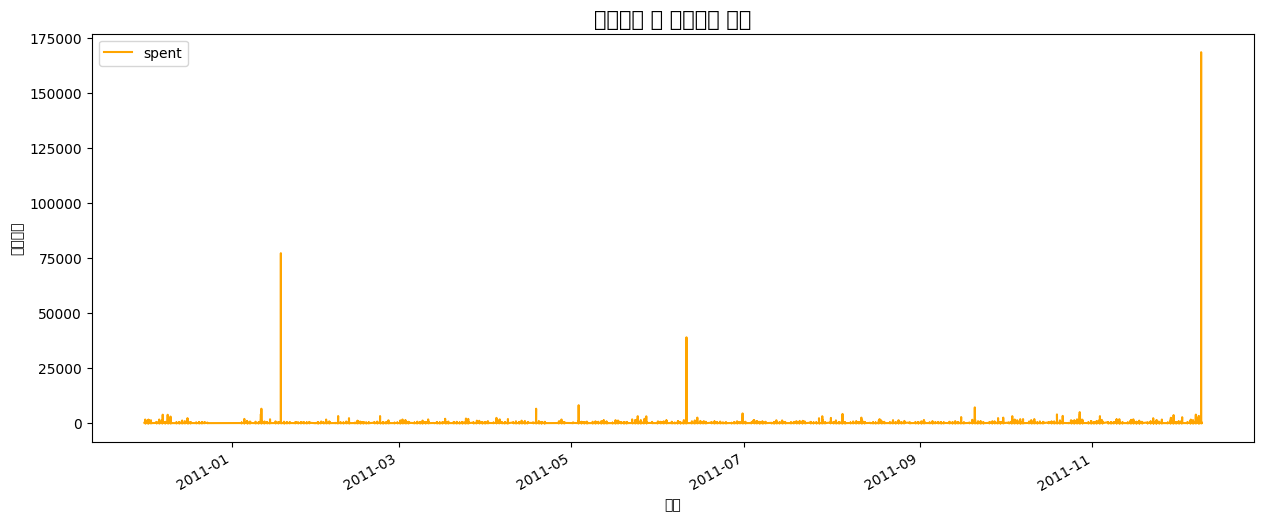

In [22]:
oln1.plot(x = 'invoicedate', y = 'spent', color='orange', figsize=(15, 6))

plt.title("주문날짜 별 판매금액 추이", fontsize = 15)
plt.xlabel('날짜')
plt.ylabel('판매금액')

plt.show()

요일/시간별 주문량


In [23]:
res2 = oln1.drop_duplicates(['invoiceno'], keep='first')
res2

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,spent,year,month,day,weekday,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,12,1,2,8
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10,2010,12,1,2,8
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047,United Kingdom,54.08,2010,12,1,2,8
21,536368,22960,JAM MAKING SET WITH JARS,6,2010-12-01 08:34:00,4.25,13047,United Kingdom,25.50,2010,12,1,2,8
25,536369,21756,BATH BUILDING BLOCK WORD,3,2010-12-01 08:35:00,5.95,13047,United Kingdom,17.85,2010,12,1,2,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541865,581583,20725,LUNCH BAG RED RETROSPOT,40,2011-12-09 12:23:00,1.45,13777,United Kingdom,58.00,2011,12,9,4,12
541867,581584,20832,RED FLOCK LOVE HEART PHOTO FRAME,72,2011-12-09 12:25:00,0.72,13777,United Kingdom,51.84,2011,12,9,4,12
541869,581585,22481,BLACK TEA TOWEL CLASSIC DESIGN,12,2011-12-09 12:31:00,0.39,15804,United Kingdom,4.68,2011,12,9,4,12
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113,United Kingdom,23.60,2011,12,9,4,12


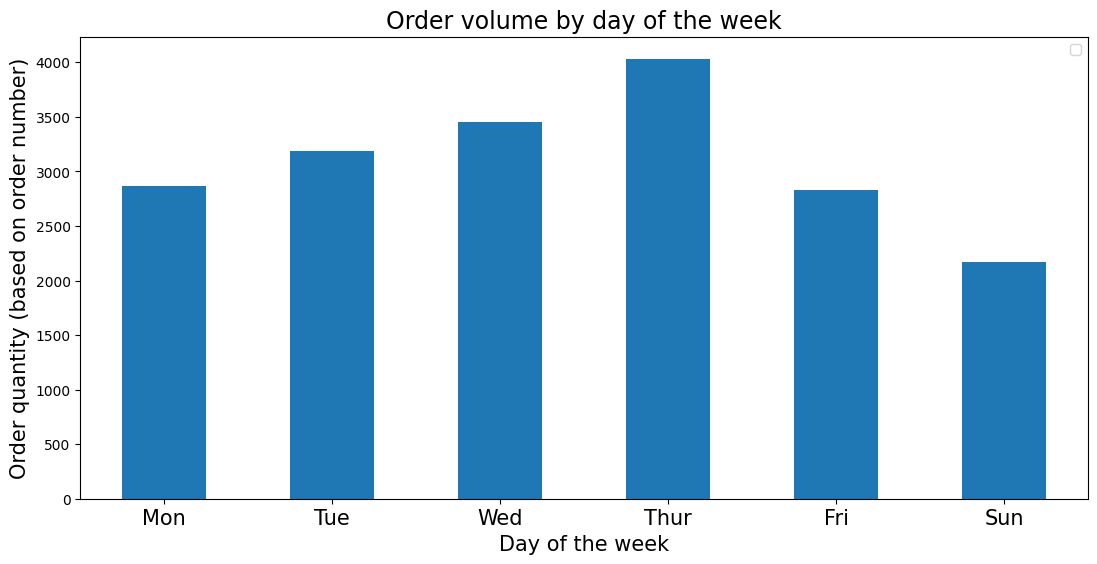

In [24]:
g1 = res2[['weekday','invoiceno']].groupby('weekday').count().plot(kind='bar', figsize=(13,6))

g1.set_xlabel('Day of the week',fontsize=15)
g1.set_ylabel('Order quantity (based on order number)',fontsize=15)
g1.set_title('Order volume by day of the week',fontsize=17)
g1.set_xticklabels(('Mon','Tue','Wed','Thur','Fri','Sun'), rotation='horizontal', fontsize=15)
g1.legend('')

plt.show()

In [25]:
res3 = res2[['hour','invoiceno']].groupby('hour').count()
res3

,invoiceno
hour,
6,1
7,29
8,555
9,1394
10,2226
11,2277
12,3129
13,2637
14,2275


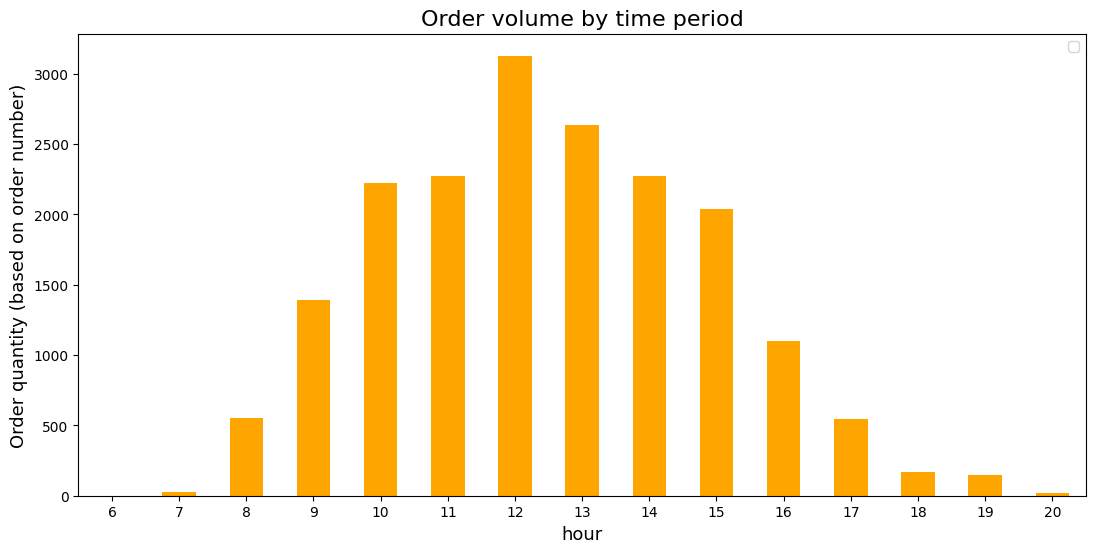

In [26]:
g2 = res3.plot(kind='bar', color = 'orange', figsize=(13,6))

g2.set_xlabel('hour',fontsize=13)
g2.set_ylabel('Order quantity (based on order number)',fontsize=13)
g2.set_title('Order volume by time period',fontsize=16)
g2.legend('')

plt.xticks(rotation=0)
plt.show()

국가별 1회 주문 평균 구매 금액

국가별 주문 건수 count 다음에 (전체 쓴 금액/주문건수)

In [27]:
res4 = oln1[['quantity','spent','country','invoiceno']]
res4

,quantity,spent,country,invoiceno
0,6,15.30,United Kingdom,536365
1,6,20.34,United Kingdom,536365
2,8,22.00,United Kingdom,536365
3,6,20.34,United Kingdom,536365
4,6,20.34,United Kingdom,536365
...,...,...,...,...
541904,12,10.20,France,581587
541905,6,12.60,France,581587
541906,4,16.60,France,581587
541907,4,16.60,France,581587


In [28]:
aa = res4.groupby(['country', 'invoiceno']).sum()
aa['count'] = 1
aa

quantity    spent  count
country     invoiceno                          
Australia   536389          107   358.25      1
            537676          214   258.90      1
            539419          146   415.70      1
            540267         4662  7011.38      1
            540280          140   143.00      1
...                         ...      ...    ...
Unspecified 559929          271   252.05      1
            561658          205   347.35      1
            561661          114   199.08      1
            563947          126   252.90      1
            564051           59   278.13      1

[18536 rows x 3 columns]

In [29]:
bb = aa.groupby('country').sum()
bb

,quantity,spent,count
country,,,
Australia,84209,138521.310,57
Austria,4881,10198.680,17
Bahrain,260,548.400,2
Belgium,23237,41196.340,98
Brazil,356,1143.600,1
Canada,2763,3666.380,6
Channel Islands,9491,20450.440,26
Cyprus,6361,13590.380,16
Czech Republic,671,826.740,2


In [30]:
bb['avg_spent'] = bb['spent'] / bb['count']
bb.sort_values(['count','avg_spent'], ascending=False, inplace=True)
bb.head()

,quantity,spent,count,avg_spent
country,,,,
United Kingdom,4269472,7308391.554,16649,438.968800
Germany,119263,228867.140,457,500.803370
France,111472,209024.050,389,537.336889
EIRE,140525,265545.900,260,1021.330385
Belgium,23237,41196.340,98,420.370816


Text(0.5, 0, 'amount')

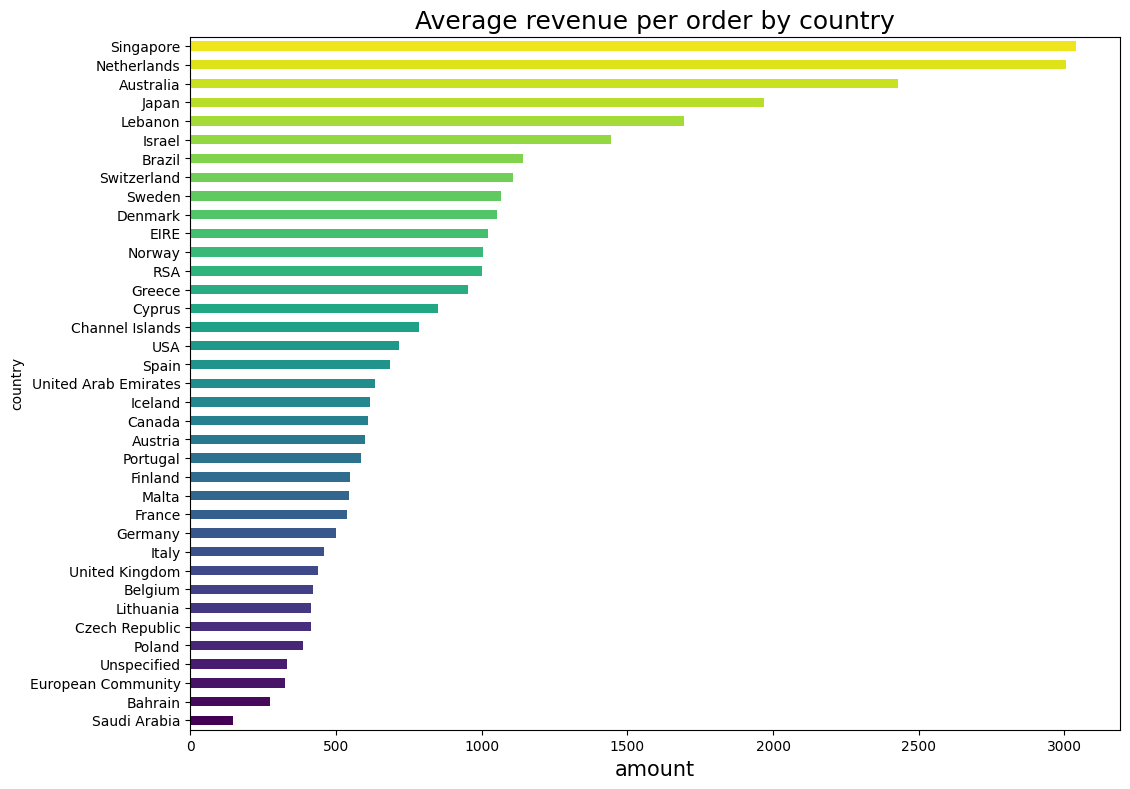

In [31]:
color = plt.cm.viridis(np.linspace(0, 1, 38))

#가로로 그릴 경우 barh 옵션 사용
bb['avg_spent'].sort_values().plot(kind='barh',figsize=(12,9),color=color)
plt.title('Average revenue per order by country', size=18)
plt.xlabel('amount',size=15)

상품명에 가장 많이 나오는 단어

In [32]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

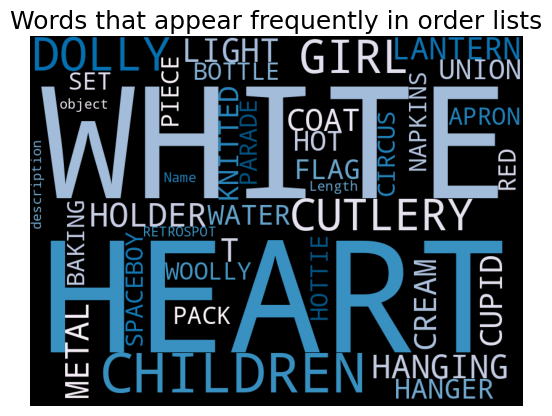

In [33]:
stopwords = set(STOPWORDS)
stopwords.add('dtype') #제외할 단어에 dtype 추가

wordcloud = WordCloud(stopwords=stopwords, background_color='black', width=800, height=600, colormap = 'PuBu').generate(str(oln1['description']))

plt.axis('off')
plt.title('Words that appear frequently in order lists', fontsize = 18)
plt.imshow(wordcloud)

* Online Retail 데이터:  
총 데이터 수:  4335272  
총 결측치 수: 136534 = 전체 데이터의 3.15%   
전체 국가 수:  38  
전체 판매 물건 수:  4223  

* 어떤 고객이 가장 지출을 많이 했는가?  
  : 고객번호 1689 이 가장 소비를 많이 했다  
  : 고객번호 3217 이 가장 소비를 적게 했다

* 상품 금액의 분포는?  
  : 대체로 2 파운드 근처에서 상품 가격대가 형성되어 있다  
  : 8 파운드 이하 상품 주문이 93.28 % 를 차지한다  
  : 수익의 88.09 % 는 8 파운드 이하의 상품에서 발생한다  
* 어떤 물건의 주문량이 높은가?  
  : WHITE HANGING HEART T-LIGHT HOLDER  
* 주문 날짜 별 판매량은?
* 요일/시간에 따라서 주문량이 다른가?  
  : 목요일 주문이 가장 많고 일요일이 주문이 가장 적다  
  : 낮 12시에 주문이 가장 많다
* 국가별 고객 1인당 평균 구매 금액은 얼마?  
  : 영국의 매출액이 가장 높지만, 1인당 구매금액은 싱가포르가 가장 높다
* 이 쇼핑몰 판매 물품의 주요 키워드는?  
  : white, heart, children